In [4]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

In [5]:
image_files = glob("/kaggle/input/caltech256/256_ObjectCategories/*/*.jp*g") # loading images

In [24]:
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True) # ResNet50 network
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [26]:
activation_layer = resnet.get_layer('conv5_block3_out')
model = Model(inputs = resnet.input, outputs = activation_layer.output)
# model takes input an image of size 224x224x3, and outputs a feature maps of size 7x7x2048, that is 
# output of last convolutional layer of resnet
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [30]:
final_dense = resnet.get_layer('predictions') 
W = final_dense.get_weights()[0] # taking weights from last layer, each weight represents
# correlation of coressponding feature to the class

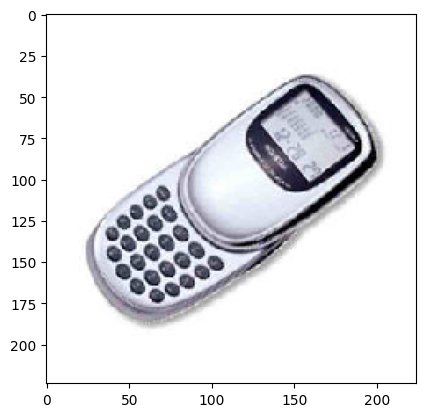

In [74]:
test_img = image.load_img(np.random.choice(image_files), target_size = (224,224,3)) # taking a random image 
x = preprocess_input(np.expand_dims(test_img, axis = 0))
plt.imshow(test_img)
plt.show()

In [75]:
fmaps = model.predict(x)[0] # feature map of size 7x7x2048, as predicted by model

1/1 [==============================] - 0s 141ms/step


In [88]:
pred = resnet.predict(x) # class of the object
classname = decode_predictions(pred)
classname

1/1 [==============================] - 0s 138ms/step


[[('n02992529', 'cellular_telephone', 0.7446871),
  ('n03485407', 'hand-held_computer', 0.11008474),
  ('n04074963', 'remote_control', 0.09929275),
  ('n03047690', 'clog', 0.006949983),
  ('n02910353', 'buckle', 0.0052011632)]]

In [86]:
print(f"Image is of : {classname[0][0][1]}")

Image is of : cellular_telephone


In [89]:
pred = np.argmax(pred[0])
print(f"class no out of 1000 classes of resnet prediction : {pred}")

class no out of 1000 classes of resnet prediction : 487


487

In [80]:
w = W[:,pred] # 2048 weights corresponding to this test image's class
w

array([ 0.00564136,  0.02141218, -0.01001785, ...,  0.02760105,
        0.02230802, -0.03133999], dtype=float32)

In [81]:
class_activation_map = fmaps.dot(w) # Class Activation Map = Dot product of features and their weightage for predicted class

In [82]:
class_activation_map = sp.ndimage.zoom(class_activation_map, (32,32), order = 1) # upscaling the class activation map

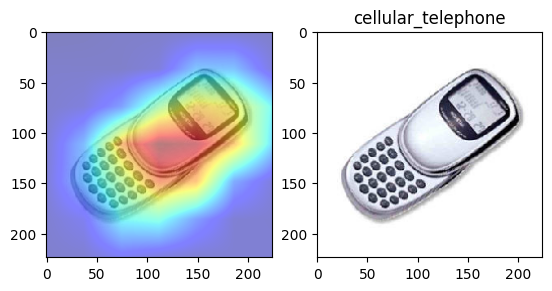

In [83]:
plt.subplot(1,2,1)
plt.imshow(test_img, alpha=0.8)
plt.imshow(class_activation_map, cmap='jet', alpha=0.5)
plt.subplot(1,2,2)
plt.imshow(test_img)
plt.title(classname[0][0][1])
plt.show()